In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data_path = "/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data/Mehring.csv"
df = pd.read_csv(data_path, index_col='datetime', parse_dates=True)
df = df.sort_index()
df

,power,global_radiation,temperature,Year,Month,Day,date
datetime,,,,,,,
2019-02-14 09:15:00,0.678,312.310,1.25,2019,2,14,2/14/2019
2019-02-14 09:30:00,0.780,363.451,1.95,2019,2,14,2/14/2019
2019-02-14 09:45:00,0.912,419.662,1.80,2019,2,14,2/14/2019
2019-02-14 10:00:00,1.025,464.191,1.75,2019,2,14,2/14/2019
2019-02-14 10:15:00,1.126,509.709,2.40,2019,2,14,2/14/2019
...,...,...,...,...,...,...,...
2020-12-21 13:15:00,0.215,113.213,12.60,2020,12,21,12/21/2020
2020-12-21 13:30:00,0.180,100.603,12.45,2020,12,21,12/21/2020
2020-12-21 13:45:00,0.149,68.183,12.50,2020,12,21,12/21/2020


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64957 entries, 2019-07-08 12:45:00 to 2020-12-21 09:15:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   power             64957 non-null  float64
 1   global_radiation  64957 non-null  float64
 2   temperature       64957 non-null  float64
 3   Year              64957 non-null  int64  
 4   Month             64957 non-null  int64  
 5   Day               64957 non-null  int64  
 6   date              64957 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ MB


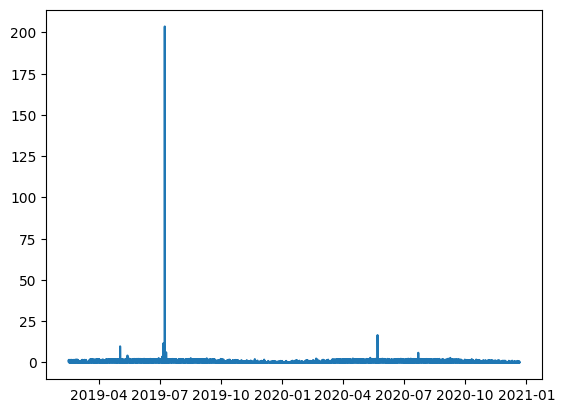

In [17]:
plt.plot(df['power'])

In [19]:
data_path = "/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data/merkel1.csv"
df2 = pd.read_csv(data_path, index_col='Date', parse_dates=True)
df2 = df2.sort_index()
df2

,Power,Wind_Speed
Date,,
2019-02-13,-0.003000,1.220261
2019-02-14,16.224550,2.218750
2019-02-15,11.045623,2.728760
2019-02-16,31.484775,3.359250
2019-02-17,140.284937,4.711771
...,...,...
2020-12-17,343.092094,6.609375
2020-12-18,194.905208,5.348958
2020-12-19,583.713083,8.022917


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 678 entries, 2019-02-13 to 2020-12-21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Power       678 non-null    float64
 1   Wind_Speed  678 non-null    float64
dtypes: float64(2)
memory usage: 15.9 KB


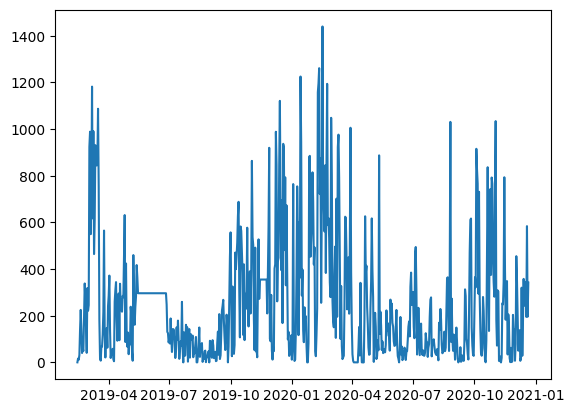

In [21]:
plt.plot(df2['Power'])

In [26]:
import pathlib
from django.conf import settings


In [32]:
def loadDataFromFile(filePath, index_col='datetime'):
    data_path = f"{settings.BASE_DIR}/data/{fileName}"
    df = pd.read_csv(data_path, index_col=index_col, parse_dates=True)
    df = df.sort_index()
    return df

In [44]:
def loadDataFromDir(dirPath, index_col=['datetime', 'Date']):
    files = pathlib.Path(dirPath)
    df_dict = {}
    for i, file in enumerate(list(files.iterdir())):
        df_dict[file.stem] = loadDataFromFile(file, index_col=index_col[i])
    return df_dict

In [45]:
df = loadDataFromDir(f"/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data", index_col=['datetime', 'Date'])
df

{'Mehring':                      power  global_radiation  temperature  Year  Month  Day  \
 datetime                                                                      
 2019-02-14 09:15:00  0.678           312.310         1.25  2019      2   14   
 2019-02-14 09:30:00  0.780           363.451         1.95  2019      2   14   
 2019-02-14 09:45:00  0.912           419.662         1.80  2019      2   14   
 2019-02-14 10:00:00  1.025           464.191         1.75  2019      2   14   
 2019-02-14 10:15:00  1.126           509.709         2.40  2019      2   14   
 ...                    ...               ...          ...   ...    ...  ...   
 2020-12-21 13:15:00  0.215           113.213        12.60  2020     12   21   
 2020-12-21 13:30:00  0.180           100.603        12.45  2020     12   21   
 2020-12-21 13:45:00  0.149            68.183        12.50  2020     12   21   
 2020-12-21 14:00:00  0.181            99.403        12.60  2020     12   21   
 2020-12-21 14:15:00  0.107  

In [40]:
files = pathlib.Path(f"/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data")
df_dict = {}
for file in list(files.iterdir()):
    df_dict[file.stem] = loadDataFromFile(file, index_col=0)
df_dict['merkel1']

,Power,Wind_Speed
Date,,
2019-02-13,-0.003000,1.220261
2019-02-14,16.224550,2.218750
2019-02-15,11.045623,2.728760
2019-02-16,31.484775,3.359250
2019-02-17,140.284937,4.711771
...,...,...
2020-12-17,343.092094,6.609375
2020-12-18,194.905208,5.348958
2020-12-19,583.713083,8.022917


In [114]:
import datetime as dt

class loadData:
    def __init__(self) -> None:
        self.options = {}
        self.data = {}
        self.datemin = dt.date(dt.MAXYEAR, 1, 1)  # Give max date to min to compare
        self.datemax = dt.date(dt.MINYEAR, 12, 31)  # Give min date to max to compare

    def _appendData(self, key, data):
        self.data[key] = data
        self.options[key] = data.columns

        datemin = self.data[key].index.min().date()
        datemax = self.data[key].index.max().date()
        if self.datemin > datemin:
            self.datemin = datemin
        if self.datemax < datemax:
            self.datemax = datemax

    def loadDataFromFile(self, filePath, index_col=0):
        filePath = pathlib.Path(filePath)
        fileName = filePath.stem
        df = pd.read_csv(filePath, index_col=index_col, parse_dates=True)
        df = df.sort_index()
        self._appendData(fileName, df)
        return df

    def loadDataFromDir(self, dirPath, index_col=None):
        dirPath = pathlib.Path(dirPath)
        files = list(dirPath.iterdir())
        
        if index_col is None:
            index_col = [0] * len(files)

        for i, file in enumerate(files):
            fileName = file.stem
            df_dict[fileName] = self.loadDataFromFile(file, index_col=index_col[i])
        return df_dict

    def getOptions(self):
        return self.options

    def getDatetimes(self):
        return self.datemin, self.datemax

In [115]:
df_temp = loadData()
df_temp.loadDataFromDir(f"/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data")

{'Mehring':                      power  global_radiation  temperature  Year  Month  Day  \
 datetime                                                                      
 2019-02-14 09:15:00  0.678           312.310         1.25  2019      2   14   
 2019-02-14 09:30:00  0.780           363.451         1.95  2019      2   14   
 2019-02-14 09:45:00  0.912           419.662         1.80  2019      2   14   
 2019-02-14 10:00:00  1.025           464.191         1.75  2019      2   14   
 2019-02-14 10:15:00  1.126           509.709         2.40  2019      2   14   
 ...                    ...               ...          ...   ...    ...  ...   
 2020-12-21 13:15:00  0.215           113.213        12.60  2020     12   21   
 2020-12-21 13:30:00  0.180           100.603        12.45  2020     12   21   
 2020-12-21 13:45:00  0.149            68.183        12.50  2020     12   21   
 2020-12-21 14:00:00  0.181            99.403        12.60  2020     12   21   
 2020-12-21 14:15:00  0.107  

In [129]:
df_temp.options['Mehring'].values.tolist()

['power', 'global_radiation', 'temperature', 'Year', 'Month', 'Day', 'date']

In [117]:
df_temp.datemin

datetime.date(2019, 2, 13)

In [118]:
df_temp.datemax

datetime.date(2020, 12, 21)

In [121]:
display(df_temp.data['Mehring'].index.min().date())
display(df_temp.data['Mehring'].index.max().date())
display(df_temp.data['merkel1'].index.min().date())
display(df_temp.data['merkel1'].index.max().date())

datetime.date(2019, 2, 14)

datetime.date(2020, 12, 21)

datetime.date(2019, 2, 13)

datetime.date(2020, 12, 21)

In [93]:
df_temp.data['Mehring'].index.max().date()
df_temp.data['Mehring'].index.min().date()

datetime.date(2019, 2, 14)

In [132]:
df_temp.data['merkel1'].loc[dt.date(2019, 3, 1):dt.date(2019, 3, 31)]

,Power,Wind_Speed
Date,,
2019-03-01,221.169646,5.713510
2019-03-02,245.047690,5.641083
2019-03-03,923.797844,9.723365
2019-03-04,988.692406,10.692792
2019-03-05,549.379958,7.583365
2019-03-06,716.872677,8.551990
2019-03-07,1181.760510,11.499000
2019-03-08,617.010531,7.878396
2019-03-09,990.564052,10.362510


In [136]:
a="asd"
b='asd'

if all(v is not None for v in [a, b]):
    print('asd')

asd


In [7]:
import sys
sys.path.insert(0, '/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/utils')

from dataset import loadData

data = loadData()
data.loadDataFromDir(dirPath='/Users/kritkorns/Mike/Jacob/x_others/03_delfine_Django/delfine_UI/data')


{'Mehring':                      power  global_radiation  temperature  Year  Month  Day  \
 datetime                                                                      
 2019-02-14 09:15:00  0.678           312.310         1.25  2019      2   14   
 2019-02-14 09:30:00  0.780           363.451         1.95  2019      2   14   
 2019-02-14 09:45:00  0.912           419.662         1.80  2019      2   14   
 2019-02-14 10:00:00  1.025           464.191         1.75  2019      2   14   
 2019-02-14 10:15:00  1.126           509.709         2.40  2019      2   14   
 ...                    ...               ...          ...   ...    ...  ...   
 2020-12-21 13:15:00  0.215           113.213        12.60  2020     12   21   
 2020-12-21 13:30:00  0.180           100.603        12.45  2020     12   21   
 2020-12-21 13:45:00  0.149            68.183        12.50  2020     12   21   
 2020-12-21 14:00:00  0.181            99.403        12.60  2020     12   21   
 2020-12-21 14:15:00  0.107  

In [21]:
data.dataAll["Mehring-power"].head()
data.dataAll["Mehring-power"].head().reset_index(level=0).to_dict('records')

[{'datetime': Timestamp('2019-02-14 09:15:00'), 'power': 0.678},
 {'datetime': Timestamp('2019-02-14 09:30:00'), 'power': 0.78},
 {'datetime': Timestamp('2019-02-14 09:45:00'), 'power': 0.912},
 {'datetime': Timestamp('2019-02-14 10:00:00'), 'power': 1.025},
 {'datetime': Timestamp('2019-02-14 10:15:00'), 'power': 1.126}]

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/solar.csv')
df.to_dict('records')

[{'State': 'California',
  'Number of Solar Plants': 289,
  'Installed Capacity (MW)': 4395,
  'Average MW Per Plant': 15.3,
  'Generation (GWh)': 10826},
 {'State': 'Arizona',
  'Number of Solar Plants': 48,
  'Installed Capacity (MW)': 1078,
  'Average MW Per Plant': 22.5,
  'Generation (GWh)': 2550},
 {'State': 'Nevada',
  'Number of Solar Plants': 11,
  'Installed Capacity (MW)': 238,
  'Average MW Per Plant': 21.6,
  'Generation (GWh)': 557},
 {'State': 'New Mexico',
  'Number of Solar Plants': 33,
  'Installed Capacity (MW)': 261,
  'Average MW Per Plant': 7.9,
  'Generation (GWh)': 590},
 {'State': 'Colorado',
  'Number of Solar Plants': 20,
  'Installed Capacity (MW)': 118,
  'Average MW Per Plant': 5.9,
  'Generation (GWh)': 235},
 {'State': 'Texas',
  'Number of Solar Plants': 12,
  'Installed Capacity (MW)': 187,
  'Average MW Per Plant': 15.6,
  'Generation (GWh)': 354},
 {'State': 'North Carolina',
  'Number of Solar Plants': 148,
  'Installed Capacity (MW)': 669,
  'Avera